In [1]:
import csv
import json
from os import chdir
import camelot 
import pandas as pd 
from datetime import datetime
import re 

In [2]:
fname = "./2020 10-K filing.pdf" 

In [3]:
# check pdfMiner
# import pdfminer
# pdfminer.__version__

In [4]:
# count nb of pages 
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import resolve1

file = open(fname, 'rb')
parser = PDFParser(file)
document = PDFDocument(parser)
# This will give you the count of pages
np = resolve1(document.catalog['Pages'])['Count']

In [5]:
# extract text from page 89 (item 7A)
from pdfminer import high_level
# pages = high_level.extract_pages(fname)
# np = len(list(pages))
pagesnb= [87]
extracted_text = high_level.extract_text(fname, "", pagesnb)
print(extracted_text)


Table of contents

term. Customers typically have the right to terminate their contracts for cause, if the Company fails to perform in accordance with the contractual
terms. For the Company’s pay-as-you-go customers, which consist of customers that sign up for the Company's Pro or Business subscription plans
through the Company's website (and which the Company previously referred to as self-serve customers), subscription and support terms are
typically monthly.

Recent Accounting Pronouncements

Refer to Note 2 to our consolidated financial statements in Part II, Item 8 of this Annual Report on Form 10-K for more information regarding recently
issued accounting pronouncements.

Item 7A. Quantitative and Qualitative Disclosures About Market Risk

We have operations in the United States and internationally, and we are exposed to market risk in the ordinary course of our business.

Interest Rate Risk

As of December 31, 2020, we had cash and cash equivalents of $108.9 million and availabl

In [6]:
# clean text 
import re
txt = extracted_text.strip()
#txt.replace('\n','|')
txt = re.sub('[\n|.]\n+','. ',txt)
txt = re.sub('[\s]+',' ',txt)
txt

"Table of contents. term. Customers typically have the right to terminate their contracts for cause, if the Company fails to perform in accordance with the contractual terms. For the Company’s pay-as-you-go customers, which consist of customers that sign up for the Company's Pro or Business subscription plans through the Company's website (and which the Company previously referred to as self-serve customers), subscription and support terms are typically monthly. Recent Accounting Pronouncements. Refer to Note 2 to our consolidated financial statements in Part II, Item 8 of this Annual Report on Form 10-K for more information regarding recently issued accounting pronouncements. Item 7A. Quantitative and Qualitative Disclosures About Market Risk. We have operations in the United States and internationally, and we are exposed to market risk in the ordinary course of our business. Interest Rate Risk. As of December 31, 2020, we had cash and cash equivalents of $108.9 million and available-

In [7]:
txt = txt[txt.index('7A')+3:]
txt

' Quantitative and Qualitative Disclosures About Market Risk. We have operations in the United States and internationally, and we are exposed to market risk in the ordinary course of our business. Interest Rate Risk. As of December 31, 2020, we had cash and cash equivalents of $108.9 million and available-for-sale securities of $923.2 million. The carrying amount of our cash equivalents approximates fair value due to the short maturities of these instruments. The primary objectives of our investment activities are the preservation of capital, the fulfillment of liquidity needs, and the fiduciary control of cash and investments. Our available-for-sale securities are held for capital preservation purposes. We do not enter into investments for trading or speculative purposes. Our cash equivalents and our investment portfolio are subject to market risk due to fluctuations in interest rates. Our future investment income may fall short of our expectations due to changes in interest rates or 

# Key phrases and Named entities 

In [8]:
#import nltk
import nltk.tokenize as tk

# sentences 
tok = tk.sent_tokenize(txt) 
for i,token in enumerate(tok):
    print("%2d-->" % (i+1), token)


 1-->  Quantitative and Qualitative Disclosures About Market Risk.
 2--> We have operations in the United States and internationally, and we are exposed to market risk in the ordinary course of our business.
 3--> Interest Rate Risk.
 4--> As of December 31, 2020, we had cash and cash equivalents of $108.9 million and available-for-sale securities of $923.2 million.
 5--> The carrying amount of our cash equivalents approximates fair value due to the short maturities of these instruments.
 6--> The primary objectives of our investment activities are the preservation of capital, the fulfillment of liquidity needs, and the fiduciary control of cash and investments.
 7--> Our available-for-sale securities are held for capital preservation purposes.
 8--> We do not enter into investments for trading or speculative purposes.
 9--> Our cash equivalents and our investment portfolio are subject to market risk due to fluctuations in interest rates.
10--> Our future investment income may fall sho

### NER 

In [9]:
import spacy 
import pytextrank

nlp = spacy.load("en_core_web_sm")

for i,tokn in enumerate(tok):
    doc = nlp(tokn)
    # Find named entities
    if len(doc.ents):
        print(f'sentence {i}: ',end='')
        for entity in doc.ents:
            print(entity.text, entity.label_)


sentence 0: Quantitative and Qualitative Disclosures About Market Risk WORK_OF_ART
sentence 1: the United States GPE
sentence 3: December 31, 2020 DATE
$108.9 million MONEY
$923.2 million MONEY
sentence 11: May 2020 DATE
$575.0 million MONEY
Notes PRODUCT
Rule 144A PERSON
the Securities Act LAW
sentence 12: Notes PRODUCT
annual DATE
Notes PRODUCT
sentence 14: Notes PRODUCT
sentence 15: Notes PRODUCT
sentence 16: 10% PERCENT
sentence 18: U.S. GPE
U.S. GPE
sentence 19: U.S. GPE
sentence 20: British NORP
Singapore GPE
sentence 21: U.S. GPE
sentence 22: the years ended December 31, 2020, 2019 DATE
2018 DATE
10% PERCENT
sentence 24: 89 CARDINAL


### Phrases

In [41]:
# tr = pytextrank.BaseTextRank()
# nlp.add_pipe(tr.PipelineComponent, name='textrank', last=True)

#nlp.add_pipe("textrank")

doc = nlp(txt)
lphs=[]
# examine the top-ranked phrases in the document
for phrase in doc._.phrases:
    lphs += [(phrase.text,phrase.rank)]
    # phrase.count, phrase.chunks)]
    
print(sorted(lphs,key=lambda x:x[1], reverse = True))

#TBD 


[('interest rates', 0.11896904239099539), ('foreign currency exchange rates', 0.11811157857670394), ('Interest Rate Risk', 0.11783879511613729), ('economic interest rate exposure', 0.11010878861517757), ('exchange rates', 0.10202752457995286), ('foreign currency', 0.09468824312582341), ('significant fluctuations', 0.08568532451503964), ('market value', 0.08027781949718013), ('U.S. dollars', 0.08006533438986096), ('changes', 0.07541886043111612), ('fair value', 0.07176611242416814), ('cash equivalents', 0.071193582246454), ('fluctuations', 0.07085262691434001), ('market risk', 0.06918019983779236), ('cash flows', 0.06873983617736909), ('a fixed annual interest rate', 0.06753872855911289), ('capital preservation purposes', 0.06694897923510712), ('cash', 0.06371732563916989), ('periods', 0.06325308290631587), ('face value', 0.061878666747411576), ('such securities', 0.06071464535674795), ('U.S.', 0.05771022502963949), ('Market Risk', 0.05544187448840909), ('securities', 0.0551937402425095

# Meaningful sentences 

In [49]:
#list(doc.sents)
# ranks sentences by summing the ranks of keywords in each 
rs=[]
for i,s in enumerate(doc.sents):
    score=0
    for ph in lphs:
        score+= ph[1] if str(s).find(ph[0])>=0 else 0
    rs+=[(s,i,score)]

lmostmeaningful = sorted(sorted(rs,key=lambda x:x[2],reverse=True)[:10], key=lambda x:x[1],reverse=False)
print(list(map(lambda x:x[0],lmostmeaningful)))
        #print(s, list(s.noun_chunks))
    

[Our cash equivalents and our investment portfolio are subject to market risk due to fluctuations in interest rates., Our future investment income may fall short of our expectations due to changes in interest rates or we may suffer losses in principal if we are forced to sell securities that decline in market value due to changes in interest rates., However, because we classify our securities as “available-for-sale,” no gains or losses are recognized due to changes in interest rates unless such securities are sold prior to maturity or declines in fair value are determined to be other-than-temporary., In May 2020, we issued $575.0 million in aggregate principal amount of the Notes to qualified institutional buyers pursuant to Rule 144A promulgated under the Securities Act., Generally, the fair market value of the Notes will increase as interest rates decline and decrease as interest rates rise., We do not believe a hypothetical 10% increase or decrease in interest rates during any of th

# dependency parsing

In [52]:
#spacy.displacy.render(doc, jupyter = True, style='dep', options={'distance':50})

tok = tk.sent_tokenize(txt) 
#for i,sent in enumerate(tok):
for i,sent in enumerate(lmostmeaningful):
    doc = nlp(str(sent))
    spacy.displacy.render(doc, style="dep", options={'distance' :80})
    for token in doc:
        print(token.text, token.dep_, token.head.text, token.head.pos_, [child for child in token.children])


( punct are AUX []
Our poss equivalents NOUN []
cash compound equivalents NOUN []
equivalents nsubj are AUX [Our, cash, and, portfolio]
and cc equivalents NOUN []
our poss portfolio NOUN []
investment compound portfolio NOUN []
portfolio conj equivalents NOUN [our, investment]
are ROOT are AUX [(, equivalents, subject, ., ,, 8, 0.4609427605561091, )]
subject acomp are AUX [to, due]
to prep subject ADJ [risk]
market compound risk NOUN []
risk pobj to ADP [market]
due prep subject ADJ [to, fluctuations]
to pcomp due ADP []
fluctuations pobj due ADP [in]
in prep fluctuations NOUN [rates]
interest compound rates NOUN []
rates pobj in ADP [interest]
. punct are AUX []
, punct are AUX []
8 npadvmod are AUX [,]
, punct 8 NUM []
0.4609427605561091 npadvmod are AUX []
) punct are AUX []


( punct fall VERB []
Our poss income NOUN []
future amod income NOUN []
investment compound income NOUN []
income nsubj fall VERB [Our, future, investment]
may aux fall VERB []
fall ROOT fall VERB [(, income, may, short, due, or, suffer, ,, 0.45128909224409286, )]
short advmod fall VERB [of]
of prep short ADJ [expectations]
our poss expectations NOUN []
expectations pobj of ADP [our]
due prep fall VERB [to, changes]
to pcomp due ADP []
changes pobj due ADP [in]
in prep changes NOUN [rates]
interest compound rates NOUN []
rates pobj in ADP [interest]
or cc fall VERB []
we nsubj suffer VERB []
may aux suffer VERB []
suffer conj fall VERB [we, may, losses, forced, .]
losses dobj suffer VERB [in]
in prep losses NOUN [principal]
principal pobj in ADP []
if mark forced VERB []
we nsubjpass forced VERB []
are auxpass forced VERB []
forced advcl suffer VERB [if, we, are, sell]
to aux sell VERB []
sell xcomp forced VERB [to, securities]
securities dobj sell VERB [decline]
that nsubj decline VER

( punct recognized VERB []
However advmod recognized VERB []
, punct recognized VERB []
because mark classify VERB []
we nsubj classify VERB []
classify advcl recognized VERB [because, we, securities, as]
our poss securities NOUN []
securities dobj classify VERB [our]
as prep classify VERB [“, available]
“ punct as ADP []
available amod as ADP [-, for]
- punct available ADJ []
for prep available ADJ [-, sale]
- punct for ADP []
sale pobj for ADP []
, punct recognized VERB []
” punct recognized VERB []
no det gains NOUN []
gains nsubjpass recognized VERB [no, or, losses]
or cc gains NOUN []
losses conj gains NOUN []
are auxpass recognized VERB []
recognized ccomp are AUX [(, However, ,, classify, ,, ”, gains, are, due, sold]
due prep recognized VERB [to, changes]
to pcomp due ADP []
changes pobj due ADP [in]
in prep changes NOUN [rates]
interest compound rates NOUN []
rates pobj in ADP [interest]
unless mark sold VERB []
such amod securities NOUN []
securities nsubjpass sold VERB [such]

( punct issued VERB []
In prep issued VERB [May]
May pobj In ADP [2020]
2020 nummod May PROPN []
, punct issued VERB []
we nsubj issued VERB []
issued ROOT issued VERB [(, In, ,, we, million, to, pursuant, ., 11, ,, 0.3122340229461895, )]
$ quantmod million NUM []
575.0 compound million NUM []
million dobj issued VERB [$, 575.0, in]
in prep million NUM [amount]
aggregate amod amount NOUN []
principal amod amount NOUN []
amount pobj in ADP [aggregate, principal, of]
of prep amount NOUN [Notes]
the det Notes PROPN []
Notes pobj of ADP [the]
to prep issued VERB [buyers]
qualified amod buyers NOUN []
institutional amod buyers NOUN []
buyers pobj to ADP [qualified, institutional]
pursuant advcl issued VERB [to]
to prep pursuant ADJ [144A]
Rule compound 144A PROPN []
144A pobj to ADP [Rule, promulgated]
promulgated acl 144A PROPN [under]
under prep promulgated VERB [Act]
the det Act PROPN []
Securities compound Act PROPN []
Act pobj under ADP [the, Securities]
. dobj issued VERB [,]
, punct 

( punct increase VERB []
Generally advmod increase VERB []
, punct increase VERB []
the det value NOUN []
fair amod value NOUN []
market compound value NOUN []
value nsubj increase VERB [the, fair, market, of]
of prep value NOUN [Notes]
the det Notes PROPN []
Notes pobj of ADP [the]
will aux increase VERB []
increase ROOT increase VERB [(, Generally, ,, value, will, decline, ., 14, 0.367404034511218, )]
as mark decline VERB []
interest compound rates NOUN []
rates nsubj decline VERB [interest]
decline advcl increase VERB [as, rates, and, decrease]
and cc decline VERB []
decrease conj decline VERB [rise]
as mark rise VERB []
interest compound rates NOUN []
rates nsubj rise VERB [interest]
rise advcl decrease NOUN [as, rates]
. punct increase VERB [,]
, punct . PUNCT []
14 npadvmod increase VERB [,]
, punct 14 NUM []
0.367404034511218 npadvmod increase VERB []
) punct increase VERB []


( punct believe VERB []
We nsubj believe VERB []
do aux believe VERB []
not neg believe VERB []
believe ROOT believe VERB [(, We, do, not, increase, have, ., ,, 16, 0.3930439086067627, )]
a det increase NOUN []
hypothetical amod increase NOUN []
10 nummod % NOUN []
% compound increase NOUN [10]
increase dobj believe VERB [a, hypothetical, %, or, decrease]
or cc increase NOUN []
decrease conj increase NOUN [in, during]
in prep decrease NOUN [rates]
interest compound rates NOUN []
rates pobj in ADP [interest]
during prep decrease NOUN [any]
any pobj during ADP [of]
of prep any PRON [periods]
the det periods NOUN []
periods pobj of ADP [the, presented]
presented acl periods NOUN []
would aux have VERB []
have ccomp believe VERB [would, impact]
a det impact NOUN []
material amod impact NOUN []
impact dobj have VERB [a, material, on]
on prep impact NOUN [statements]
our poss statements NOUN []
consolidated amod statements NOUN []
financial amod statements NOUN []
statements pobj on ADP [our

( punct is AUX []
The det currency NOUN []
functional amod currency NOUN []
currency nsubj is AUX [The, functional, of]
of prep currency NOUN [subsidiaries]
our poss subsidiaries NOUN []
foreign amod subsidiaries NOUN []
subsidiaries pobj of ADP [our, foreign]
is ROOT is AUX [(, currency, dollar, are, ., ,, 18, ,, 0.837235450312939, )]
the det dollar NOUN []
U.S. compound dollar NOUN []
dollar attr is AUX [the, U.S., and, results]
and cc dollar NOUN []
our poss results NOUN []
results conj dollar NOUN [our, of]
of prep results NOUN [operations]
operations pobj of ADP [and, flows]
and cc operations NOUN []
cash compound flows NOUN []
flows conj operations NOUN [cash]
are ccomp is AUX [subject]
subject acomp are AUX [to]
to prep subject ADJ [fluctuations]
fluctuations pobj to ADP [due]
due amod fluctuations NOUN [to, changes]
to pcomp due ADJ []
changes pobj due ADJ [in, relative]
in prep changes NOUN [rates]
foreign amod currency NOUN []
currency compound rates NOUN [foreign]
exchange c

( punct denominated VERB []
Our poss expenses NOUN []
expenses nsubjpass denominated VERB [Our]
are auxpass denominated VERB []
generally advmod denominated VERB []
denominated ROOT denominated VERB [(, expenses, are, generally, in, ., 20, 0.7330320828954378, )]
in prep denominated VERB [currencies]
the det currencies NOUN []
currencies pobj in ADP [the, of]
of prep currencies NOUN [countries]
the det countries NOUN []
countries pobj of ADP [the, located]
in prep are AUX [which]
which pobj in ADP []
our poss operations NOUN []
operations nsubjpass located VERB [our]
are auxpass located VERB []
located relcl countries NOUN [operations, are, and, are]
and cc located VERB []
are conj located VERB [in, subject]
subject acomp are AUX [to]
to prep subject ADJ [fluctuations]
fluctuations pobj to ADP [due, ,, changes]
due amod fluctuations NOUN [to, changes]
to pcomp due ADJ []
changes pobj due ADJ [in]
in prep changes NOUN [rates]
foreign amod currency NOUN []
currency compound rates NOUN [fo

( punct experience VERB []
As mark fluctuate VERB []
exchange compound rates NOUN []
rates nsubj fluctuate VERB [exchange]
may aux fluctuate VERB []
fluctuate advcl experience VERB [As, rates, may, significantly, between, converted]
significantly advmod fluctuate VERB []
between prep fluctuate VERB [periods]
periods pobj between ADP [,, revenue, ,]
, punct periods NOUN []
revenue conj periods NOUN [and, expenses]
and cc revenue NOUN []
operating compound expenses NOUN []
expenses conj revenue NOUN [operating]
, punct periods NOUN []
when advmod converted VERB []
converted advcl fluctuate VERB [when, into]
into prep converted VERB [dollars]
U.S. compound dollars NOUN []
dollars pobj into ADP [U.S.]
, punct experience VERB []
may aux experience VERB []
also advmod experience VERB []
experience ROOT experience VERB [(, fluctuate, ,, may, also, fluctuations, ., 21, 0.5483995520277323, )]
significant amod fluctuations NOUN []
fluctuations dobj experience VERB [significant, between]
between 

( punct had VERB []
During prep had VERB [years, ,, and, 2018]
the det years NOUN []
years pobj During ADP [the, ended]
ended acl years NOUN [December]
December npadvmod ended VERB [31, ,, 2020, ,, 2019]
31 nummod December PROPN []
, punct December PROPN []
2020 nummod December PROPN []
, punct December PROPN []
2019 nummod December PROPN []
, punct During ADP []
and cc During ADP []
2018 conj During ADP []
a det change NOUN []
hypothetical amod change NOUN []
10 nummod % NOUN []
% compound change NOUN [10]
change nsubj had VERB [a, hypothetical, %, in]
in prep change NOUN [rates]
foreign amod currency NOUN []
currency compound rates NOUN [foreign]
exchange compound rates NOUN []
rates pobj in ADP [currency, exchange, applicable]
applicable amod rates NOUN [to]
to prep applicable ADJ [business]
our poss business NOUN []
business pobj to ADP [our]
would aux had VERB []
not neg had VERB []
have aux had VERB []
had ROOT had VERB [(, During, change, would, not, have, impact, ., ,, 22, 0.54

# Risk related Phrases 

In [63]:
# Look into phrases of question a
#   find out if it is related to "risk" (search for "risk")
#       from the word "risk"look at dependecies in the sentence, and find out if their tag is a noun (ex: "sovereign/credit/liquidity risk") 
#           if found return the sentence         

lphrisk = []
for ph in lphs:
    if str(ph).lower().find("risk")>=0:
        lphrisk +=[ph]

for i,s in enumerate(doc.sents):
    for ph in lphrisk:
        #print(ph)
        print(ph[0])
        # if str(s).find(ph[0])>=0:
        #     rootword = "risk"
        #     print(s)
            
        #     doc = nlp(str(s))
        #     for tok in doc:
        #         print(tok.head.text, tok.head.pos_)


Interest Rate Risk
market risk
Market Risk
Foreign Currency Risk
Quantitative and Qualitative Disclosures About Market Risk


In [54]:
lphrisk


['Interest Rate Risk',
 0.11783879511613729,
 'market risk',
 0.06918019983779236,
 'Market Risk',
 0.05544187448840909,
 'Foreign Currency Risk',
 0.051138329095087726,
 'Quantitative and Qualitative Disclosures About Market Risk',
 0.02724621198134477]

# Profit Margin since 2017

In [86]:
# reads document with camelot 
pagesToExtract ='62-64' ## reduced scope to save time vs scanning the whole document

tables= camelot.read_pdf(fname, flavor='stream',pages=pagesToExtract,strip_text='\r') #,table_regions=['10,10,560,500'])    #, flavor='stream', )
tables

<TableList n=3>

In [147]:
# check that table contains "income" --> to use in the case we want to automatically identify tables related to Income --> can make it more complex at will 
import functools
tidx=1
df=tables[tidx].df
s = df.apply(lambda x: str(x).lower().find("income")>0)
keeptable= functools.reduce(lambda x,y: x or y, s)
print(f"table is about income: {keeptable}")
df = tables[tidx].df
df

table is about income: True


1,,,2020,,2019,,2018,,2017,,2016
0,,,,,,"Year Ended December 31,",,,,,
1,,,2020,,2019,,2018,,2017,,2016
2,,,,,,"(in thousands, except per share data)",,,,,
3,Consolidated Statements of Operations Data:,,,,,,,,,,
4,Revenue,$,"431,059",$,"287,022",$,"192,674",$,"134,915",$,"84,791"
5,(1),,,,,,,,,,
6,Cost of revenue,,"101,055",,"63,423",,"43,537",,"28,788",,"23,962"
7,Gross profit,,"330,004",,"223,599",,"149,137",,"106,127",,"60,829"
8,Operating expenses:,,,,,,,,,,
9,(1),,,,,,,,,,


1 7 4


<AxesSubplot:title={'center':'profit margin'}>

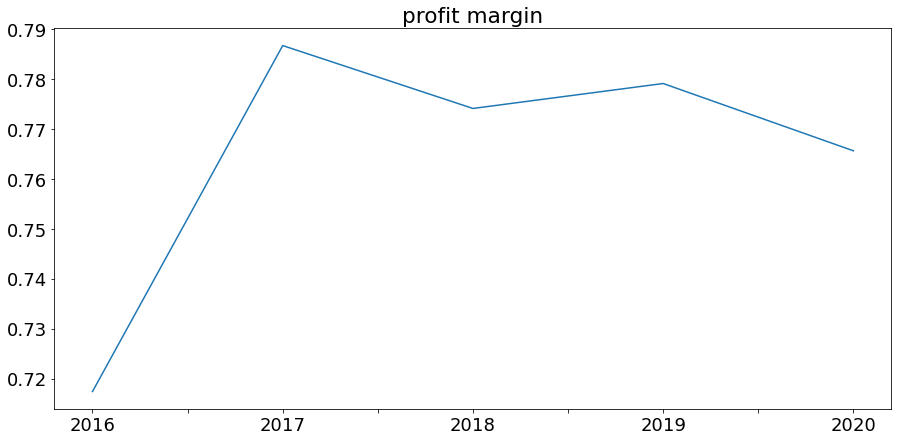

In [168]:
# we could directly look at the figures but the idea is to bea able to work this on any table 
df = tables[tidx].df
# search for columns with dates 
lyears = ['2016','2017','2018','2019','2020','2021','2022']
ll = list(df.isin(lyears).sum(axis=1))
rdates = ll.index(max(ll))
# search for row with "gross profit"
rpro = df.loc[df.iloc[:,0].str.lower().str.contains('profit'),:].index[0]
# search for row with "revenue"
rrev = df.loc[df.iloc[:,0].str.lower().str.contains('revenue'),:].index[0]
print(rdates, rpro, rrev)

df.columns = df.iloc[rdates,:]
df = df.iloc[:,[True] + list(df.columns.isin(lyears)[1:])]
df.columns = ['name']+list(df.columns[1:])
df = df.loc[[rpro,rrev],:]
df.set_index('name', inplace=True)
df = df[sorted(df.columns)]
df = df.apply(lambda x: x.str.replace(',',''))
df= df.astype(float).T
df['Profit margin'] = df.iloc[:,0]/df.iloc[:,1]
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 18}) # must set in top
df['Profit margin'].plot(title = "profit margin", figsize=(15,7))
